In [1]:
%matplotlib inline

import numpy as np
import rasterio
from osgeo import gdal, gdal_array
import matplotlib.pyplot as plt
plt.style.use('ggplot') 

import pandas as pd

In [51]:
final_0515_2015_fn = '../paper_data/final_products/2015_0515_meanresiduals.tif'
final_0414_2015_fn = '../paper_data/final_products/2015_0414_meanresiduals.tif'

final_0515_2016_fn = '../paper_data/final_products/2016_0515_meanresiduals.tif'
final_0414_2016_fn = '../paper_data/final_products/2016_0414_meanresiduals.tif'

In [52]:
# 2015 - 2005-2015 fit
with rasterio.open(final_0515_2015_fn) as image:
    final_0515_2015_ds = image.read()
    final_0515_2015 = final_0515_2015_ds[0]
print(final_0515_2015.shape)

# 2015 - 2004-2014 fit
with rasterio.open(final_0414_2015_fn) as image:
    final_0414_2015_ds = image.read()
    final_0414_2015 = final_0414_2015_ds[0]
print(final_0414_2015.shape)

# 2016 - 2005-2015 fit
with rasterio.open(final_0515_2016_fn) as image:
    final_0515_2016_ds = image.read()
    final_0515_2016 = final_0515_2016_ds[0]
print(final_0515_2016.shape)

# 2016 - 2004-2014 fit
with rasterio.open(final_0414_2016_fn) as image:
    final_0414_2016_ds = image.read()
    final_0414_2016 = final_0414_2016_ds[0]
print(final_0414_2016.shape)

(9729, 12851)
(9729, 12851)
(9729, 12851)
(9729, 12851)


In [53]:
diff_2015 = (final_0515_2015 - final_0414_2015)
diff_2016 = (final_0515_2016 - final_0414_2016)

In [5]:
# write difference to raster
in_ds = gdal.Open(final_0515_2015_fn, gdal.GA_ReadOnly)
output_fn = '../paper_data/product_comp/diff_2015.tif'

out_driver = gdal.GetDriverByName("GTiff")
out_ds = out_driver.Create(output_fn, 
                           diff_2015.shape[1],  # x size
                           diff_2015.shape[0],  # y size
                           1,  # number of bands
                           gdal.GDT_Float64)
out_ds.SetProjection(in_ds.GetProjection())
out_ds.SetGeoTransform(in_ds.GetGeoTransform())
out_ds.GetRasterBand(1).WriteArray(diff_2015)
out_ds.GetRasterBand(1).SetNoDataValue(-9999)
#out_ds.GetRasterBand(1).SetColorTable(ct)
out_ds.GetRasterBand(1).SetDescription('difference - 2015')
out_ds = None

In [6]:
# write difference to raster
in_ds = gdal.Open(final_0515_2016_fn, gdal.GA_ReadOnly)
output_fn = '../paper_data/product_comp/diff_2016.tif'

out_driver = gdal.GetDriverByName("GTiff")
out_ds = out_driver.Create(output_fn, 
                           diff_2016.shape[1],  # x size
                           diff_2016.shape[0],  # y size
                           1,  # number of bands
                           gdal.GDT_Float64)
out_ds.SetProjection(in_ds.GetProjection())
out_ds.SetGeoTransform(in_ds.GetGeoTransform())
out_ds.GetRasterBand(1).WriteArray(diff_2016)
out_ds.GetRasterBand(1).SetNoDataValue(-9999)
#out_ds.GetRasterBand(1).SetColorTable(ct)
out_ds.GetRasterBand(1).SetDescription('difference - 2016')
out_ds = None

In [7]:
RMSE_1231_0515_fn = '../paper_data/p012r031_inputs/YATSM_moths_paper_3_p012r031_harm_G_2010-07-01_refit.tif'
RMSE_1231_0414_fn = '../paper_data/p012r031_inputs/YATSM_moths_0414_p012r031_harm_G_2010-07-01_refit.tif'

RMSE_1331_0515_fn = '../paper_data/p013r031_inputs/YATSM_moths_paper_3_p013r031_harm_G_2010-07-01_refit.tif'
RMSE_1331_0414_fn = '../paper_data/p013r031_inputs/YATSM_moths_0414_p013r031_harm_G_2010-07-01_refit.tif'

In [8]:
with rasterio.open(RMSE_1231_0515_fn) as image:
    RMSE_1231_0515_ds = image.read()
    RMSE_1231_0515 = RMSE_1231_0515_ds[4] # RMSE
    
with rasterio.open(RMSE_1231_0414_fn) as image:
    RMSE_1231_0414_ds = image.read()
    RMSE_1231_0414 = RMSE_1231_0414_ds[4] # RMSE
    
with rasterio.open(RMSE_1331_0515_fn) as image:
    RMSE_1331_0515_ds = image.read()
    RMSE_1331_0515 = RMSE_1331_0515_ds[4] # RMSE
    
with rasterio.open(RMSE_1331_0414_fn) as image:
    RMSE_1331_0414_ds = image.read()
    RMSE_1331_0414 = RMSE_1331_0414_ds[4] # RMSE

In [9]:
diff_1231_RMSE = (RMSE_1231_0515 - RMSE_1231_0414)
diff_1331_RMSE = (RMSE_1331_0515 - RMSE_1331_0414)

In [10]:
# write difference to raster
in_ds = gdal.Open(RMSE_1231_0515_fn, gdal.GA_ReadOnly)
output_fn = '../paper_data/product_comp/diff_1231_RMSE.tif'

out_driver = gdal.GetDriverByName("GTiff")
out_ds = out_driver.Create(output_fn, 
                           diff_1231_RMSE.shape[1],  # x size
                           diff_1231_RMSE.shape[0],  # y size
                           1,  # number of bands
                           gdal.GDT_Float64)
out_ds.SetProjection(in_ds.GetProjection())
out_ds.SetGeoTransform(in_ds.GetGeoTransform())
out_ds.GetRasterBand(1).WriteArray(diff_1231_RMSE)
out_ds.GetRasterBand(1).SetNoDataValue(-9999)
#out_ds.GetRasterBand(1).SetColorTable(ct)
out_ds.GetRasterBand(1).SetDescription('RMSE - p012r031')
out_ds = None

In [11]:
# write difference to raster
in_ds = gdal.Open(RMSE_1331_0515_fn, gdal.GA_ReadOnly)
output_fn = '../paper_data/product_comp/diff_1331_RMSE.tif'

out_driver = gdal.GetDriverByName("GTiff")
out_ds = out_driver.Create(output_fn, 
                           diff_1331_RMSE.shape[1],  # x size
                           diff_1331_RMSE.shape[0],  # y size
                           1,  # number of bands
                           gdal.GDT_Float64)
out_ds.SetProjection(in_ds.GetProjection())
out_ds.SetGeoTransform(in_ds.GetGeoTransform())
out_ds.GetRasterBand(1).WriteArray(diff_1331_RMSE)
out_ds.GetRasterBand(1).SetNoDataValue(-9999)
#out_ds.GetRasterBand(1).SetColorTable(ct)
out_ds.GetRasterBand(1).SetDescription('RMSE - p013r031')
out_ds = None

In [20]:
FHTE_fn = '/projectnb/landsat/projects/Massachusetts/Moths/GIS_data/FHTE_ref/RI2_2015_aYs_2015_2016_jDs_140_200_NDVI_hybrid_ZScore.tif'

with rasterio.open(FHTE_fn) as image:
    FHTE_ds = image.read()
    FHTE = FHTE_ds[0] 


In [22]:
FHTE_2016 = np.zeros(FHTE.shape)
FHTE_2016[FHTE == 3] = 1
FHTE_2016[FHTE == 4] = 1

# write difference to raster
in_ds = gdal.Open(FHTE_fn, gdal.GA_ReadOnly)
output_fn = '../paper_data/product_comp/2016_FHTE_mask.tif'

out_driver = gdal.GetDriverByName("GTiff")
out_ds = out_driver.Create(output_fn, 
                           FHTE_2016.shape[1],  # x size
                           FHTE_2016.shape[0],  # y size
                           1,  # number of bands
                           gdal.GDT_Float64)
out_ds.SetProjection(in_ds.GetProjection())
out_ds.SetGeoTransform(in_ds.GetGeoTransform())
out_ds.GetRasterBand(1).WriteArray(FHTE_2016)
out_ds.GetRasterBand(1).SetNoDataValue(0)
#out_ds.GetRasterBand(1).SetColorTable(ct)
out_ds.GetRasterBand(1).SetDescription('2016 FHTE')
out_ds = None

In [23]:
    
FHTE_2015 = np.zeros(FHTE.shape)
FHTE_2015[FHTE == 2] = 1
FHTE_2015[FHTE == 3] = 1

# write difference to raster
in_ds = gdal.Open(FHTE_fn, gdal.GA_ReadOnly)
output_fn = '../paper_data/product_comp/2015_FHTE_mask.tif'

out_driver = gdal.GetDriverByName("GTiff")
out_ds = out_driver.Create(output_fn, 
                           FHTE_2015.shape[1],  # x size
                           FHTE_2015.shape[0],  # y size
                           1,  # number of bands
                           gdal.GDT_Float64)
out_ds.SetProjection(in_ds.GetProjection())
out_ds.SetGeoTransform(in_ds.GetGeoTransform())
out_ds.GetRasterBand(1).WriteArray(FHTE_2015)
out_ds.GetRasterBand(1).SetNoDataValue(0)
#out_ds.GetRasterBand(1).SetColorTable(ct)
out_ds.GetRasterBand(1).SetDescription('2015 FHTE')
out_ds = None

## Difference between stable periods - with NLCD forest mask

In [2]:
final_0515_2015_mask_fn = '../paper_data/final_products/2015_0515_meanresiduals_withmask.tif'
final_0414_2015_mask_fn = '../paper_data/final_products/2015_0414_meanresiduals_withmask.tif'

final_0515_2016_mask_fn = '../paper_data/final_products/2016_0515_meanresiduals_withmask.tif'
final_0414_2016_mask_fn = '../paper_data/final_products/2016_0414_meanresiduals_withmask.tif'

In [3]:
# 2015 - 2005-2015 fit
with rasterio.open(final_0515_2015_mask_fn) as image:
    final_0515_2015_ds = image.read()
    final_0515_2015 = final_0515_2015_ds[0]
    final_0515_2015_m = final_0515_2015_ds[1]
print(final_0515_2015.shape)

# 2015 - 2004-2014 fit
with rasterio.open(final_0414_2015_mask_fn) as image:
    final_0414_2015_ds = image.read()
    final_0414_2015 = final_0414_2015_ds[0]
    final_0414_2015_m = final_0414_2015_ds[1]
print(final_0414_2015.shape)

# 2016 - 2005-2015 fit
with rasterio.open(final_0515_2016_mask_fn) as image:
    final_0515_2016_ds = image.read()
    final_0515_2016 = final_0515_2016_ds[0]
    final_0515_2016_m = final_0515_2016_ds[1]
print(final_0515_2016.shape)

# 2016 - 2004-2014 fit
with rasterio.open(final_0414_2016_mask_fn) as image:
    final_0414_2016_ds = image.read()
    final_0414_2016 = final_0414_2016_ds[0]
    final_0414_2016_m = final_0414_2016_ds[1]
print(final_0414_2016.shape)

(9729, 12851)
(9729, 12851)
(9729, 12851)
(9729, 12851)


In [4]:
diff_2015 = (final_0515_2015 - final_0414_2015)
diff_2016 = (final_0515_2016 - final_0414_2016)

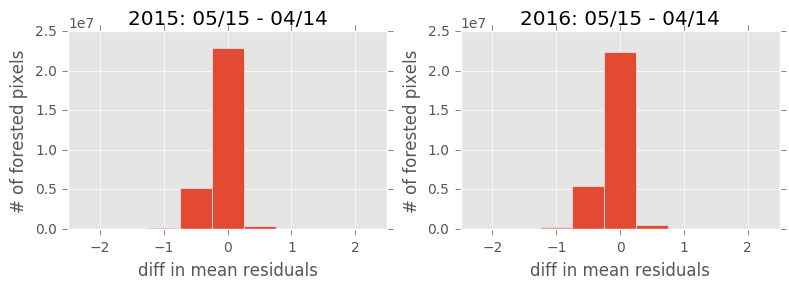

In [5]:
diff_2015[np.where(final_0414_2015_m == 0)] = np.nan
diff_2016[np.where(final_0515_2016_m == 0)] = np.nan

fig = plt.figure(figsize=(8,3))
ax1 = fig.add_subplot(1,2,1)
plt.hist(diff_2015[~np.isnan(diff_2015)], bins=np.arange(-1.25, 2.5, 0.5))
plt.title('2015: 05/15 - 04/14')
plt.xlim(-2.5, 2.5)
plt.xlabel('diff in mean residuals')
plt.ylabel('# of forested pixels')

ax2 = fig.add_subplot(1,2,2)
plt.hist(diff_2016[~np.isnan(diff_2016)], bins=np.arange(-1.25, 2.5, 0.5))
plt.title('2016: 05/15 - 04/14')
plt.xlim(-2.5, 2.5)
plt.xlabel('diff in mean residuals')
plt.ylabel('# of forested pixels')

plt.tight_layout()
plt.show()

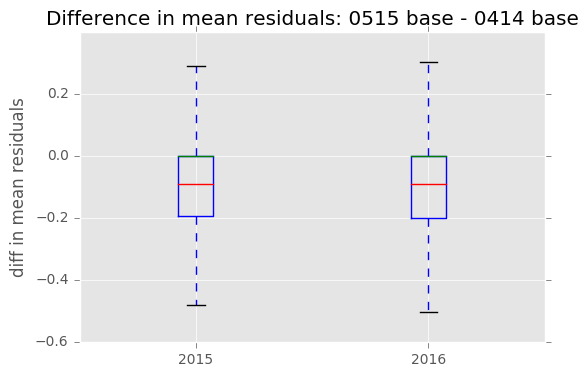

In [45]:
data = [diff_2015[~np.isnan(diff_2015)], diff_2016[~np.isnan(diff_2016)]]
medianprops = dict(linestyle='-', linewidth=1, color='green')
#plt.boxplot(diff_2015[~np.isnan(diff_2015)], 0, '')
#plt.boxplot(diff_2016[~np.isnan(diff_2016)], 0, '')
labels = ['2015', '2016']
plt.boxplot(data, labels=labels, showfliers=False, meanline=True, showmeans=True, medianprops=medianprops)
plt.ylabel('diff in mean residuals')
plt.title('Difference in mean residuals: 0515 base - 0414 base')
plt.savefig('residuals_boxplots.png')
plt.show()

In [50]:
diff_2015_abs = abs((final_0515_2015) - (final_0414_2015))
diff_2016_abs = abs((final_0515_2016) - (final_0414_2016))
diff_2015_abs[np.where(final_0414_2015_m == 0)] = np.nan
diff_2016_abs[np.where(final_0515_2016_m == 0)] = np.nan

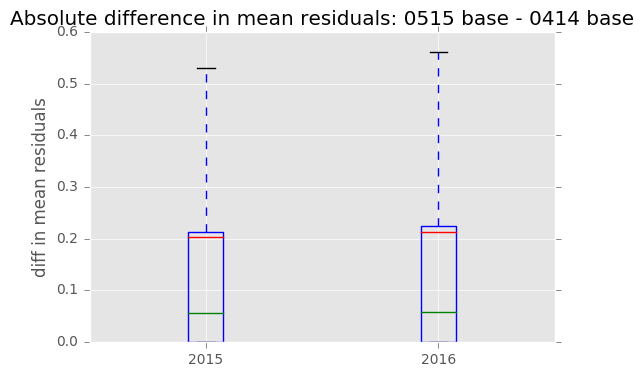

In [51]:
data = [diff_2015_abs[~np.isnan(diff_2015_abs)], diff_2016_abs[~np.isnan(diff_2016_abs)]]
medianprops = dict(linestyle='-', linewidth=1, color='green')
#plt.boxplot(diff_2015[~np.isnan(diff_2015)], 0, '')
#plt.boxplot(diff_2016[~np.isnan(diff_2016)], 0, '')
labels = ['2015', '2016']
plt.boxplot(data, labels=labels, showfliers=False, meanline=True, showmeans=True, medianprops=medianprops)
plt.ylabel('diff in mean residuals')
plt.title('Absolute difference in mean residuals: 0515 base - 0414 base')
plt.savefig('residuals_boxplots_abs.png')
plt.show()